# Insurance claim prediction 

## Problem Statement :
Dataset is about Vehicle  insurance claim prediction in which we have two datasets one is train and another is test data.
The challenge is to predict Workers Compensation claims using the realistic data .

## Independent/Predictor Variables

- ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost

## Dependent/Target Variable
- UltimateIncurredClaimCost: Total claims payments by the insurance company.

- The Target variable 'Ultimate Incurred Claim Cost' is a continuous variable which accounts for the total claim payment by the insurance company

# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
#collecting data
df = pd.read_csv('train_SJC.csv')
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


In [3]:
#Renaming the column names in train data as it is "unnamed"
df=df.rename(columns={"Unnamed: 0":"ClaimNumber","Unnamed: 1":"DateTimeOfAccident","Unnamed: 3":"Age","Unnamed: 4":"Gender",
                      "Unnamed: 5":"MaritalStatus","Unnamed: 6":"DependentChildren","Unnamed: 8":"WeeklyWages",
                      "Unnamed: 9":"PartTimeFullTime","Unnamed: 10":"HoursWorkedPerWeek","Unnamed: 12":"ClaimDescription",
                      "Unnamed: 13":"InitialIncurredCalimsCost","Unnamed: 14":'UltimateIncurredClaimCost'},inplace=False)

In [4]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


In [5]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [6]:
#for training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  obj

In [7]:
#Checking for Categorical Data in train data
df.select_dtypes(exclude=['int64','float64']).columns 

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [8]:
#Changing the data type for some columns in train data

df['Age'] = pd.to_numeric(df['Age']) 
df['DependentChildren'] = pd.to_numeric(df['DependentChildren'])
df['DependentsOther'] = pd.to_numeric(df['DependentsOther'])
df['WeeklyWages'] = pd.to_numeric(df['WeeklyWages'])
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'])
df['DaysWorkedPerWeek'] = pd.to_numeric(df['DaysWorkedPerWeek'])
df['InitialIncurredCalimsCost'] = pd.to_numeric(df['InitialIncurredCalimsCost'])
df['UltimateIncurredClaimCost'] = pd.to_numeric(df['UltimateIncurredClaimCost'])
df['DateTimeOfAccident']=pd.to_datetime(df['DateTimeOfAccident'])
df['DateReported']=pd.to_datetime(df['DateReported'])

In [9]:
#To check if the data type changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                36176 non-null  object             
 1   DateTimeOfAccident         36176 non-null  datetime64[ns, UTC]
 2   DateReported               36176 non-null  datetime64[ns, UTC]
 3   Age                        36176 non-null  int64              
 4   Gender                     36176 non-null  object             
 5   MaritalStatus              36154 non-null  object             
 6   DependentChildren          36176 non-null  int64              
 7   DependentsOther            36176 non-null  float64            
 8   WeeklyWages                36120 non-null  float64            
 9   PartTimeFullTime           36176 non-null  object             
 10  HoursWorkedPerWeek         36127 non-null  float64            
 11  Da

In [10]:
 #checking the description of train data
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


In [11]:
#Checking for duplicate values
df.duplicated().sum() 

0

In [12]:
#Checking for null values
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [13]:
#Handling null values using mean and mode imputation to treating the missing values
df['WeeklyWages']=df['WeeklyWages'].fillna(df['WeeklyWages'].mean())
df['HoursWorkedPerWeek']=df['HoursWorkedPerWeek'].fillna(df['HoursWorkedPerWeek'].mean())
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [14]:
#To verify if there are any more missing values
df.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

No Null values are present


**Dividing the data into categorical and numerical data**

In [15]:
df_num = df[['Age', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
             'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']]

df_cat = df[['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Gender', 'MaritalStatus', 'PartTimeFullTime', 'ClaimDescription']]


In [16]:
df['ClaimDescription'].nunique()

20596

There are 20596 unique claims made.

In [17]:
df.ClaimNumber.count()

36176

The total number of claims filed is 36176.

In [18]:
df['ClaimNumber'].nunique()

29456

The total number of claims that were filed is 36176 but number of unique claims are 29456.

**Data Transfromation - Data Binning**

In [19]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 1        48
2        43
3        30
4        41
5        36
         ..
36172    20
36173    35
36174    52
36175    28
36176    29
Name: Age, Length: 36176, dtype: int64>

In [20]:
df['Age'].max()

79

In [21]:
df['Age'].min()

13

In [22]:
df['Age_Bin']=pd.cut(df['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
df['Age_Bin']

1        Middle-Age
2        Middle-Age
3        Middle-Age
4        Middle-Age
5        Middle-Age
            ...    
36172         Young
36173    Middle-Age
36174           Old
36175    Middle-Age
36176    Middle-Age
Name: Age_Bin, Length: 36176, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Old']

In [23]:
df['WeeklyWages'].value_counts

<bound method IndexOpsMixin.value_counts of 1         500.00
2         509.34
3         709.10
4         555.46
5         377.10
          ...   
36172     344.16
36173    1668.83
36174     204.87
36175     730.87
36176     200.00
Name: WeeklyWages, Length: 36176, dtype: float64>

In [24]:
df['WeeklyWages'].max()

7497.0

In [25]:
df['WeeklyWages'].min()

1.0

In [26]:
df['WeeklyWages_Bin']=pd.cut(df['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df['WeeklyWages_Bin']

1                  Low
2                  Low
3                  Low
4                  Low
5                  Low
             ...      
36172              Low
36173    Below Average
36174              Low
36175              Low
36176              Low
Name: WeeklyWages_Bin, Length: 36176, dtype: category
Categories (5, object): ['Low' < 'Below Average' < 'Average Wage' < 'Above Average' < 'High']

# Exploratory Data Analysis : 

## Univariate Analysis

In [27]:
Gender = df['Gender'].value_counts()
Gender = [Gender[0] / sum(Gender) * 100, Gender[1] / sum(Gender) * 100 , Gender[2] / sum(Gender) * 100] 

MaritalStatus = df['MaritalStatus'].value_counts()
MaritalStatus = [MaritalStatus[0] / sum(MaritalStatus) * 100, MaritalStatus[1] / sum(MaritalStatus) * 100 , MaritalStatus[2] / sum(MaritalStatus) * 100] 

PartTimeFullTime = df['PartTimeFullTime'].value_counts()
PartTimeFullTime = [PartTimeFullTime[0] / sum(PartTimeFullTime) * 100, PartTimeFullTime[1] / sum(PartTimeFullTime) * 100 ] 

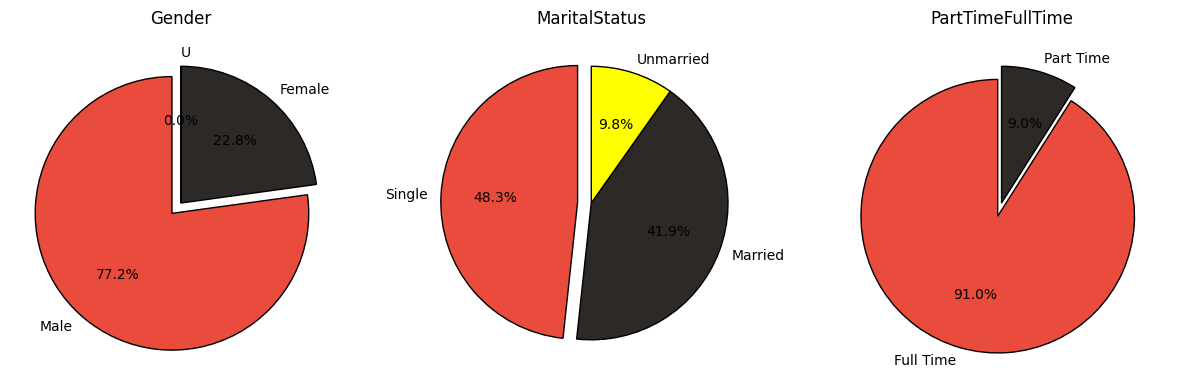

In [28]:
colors = ['#E94B3C','#2D2926','#FFFF00']

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(Gender,labels = ['Male','Female','U'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,3,2)
plt.pie(MaritalStatus,labels = ['Single', 'Married','Unmarried'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MaritalStatus');

plt.subplot(1,3,3)
plt.pie(PartTimeFullTime,labels = ['Full Time','Part Time'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PartTimeFullTime');



- From the above plot we can see approximately 77% people who claimed for insurance are males while 22% are females.
- We can see approximately 48% people who claimed for insurance are single while 42% are married and a very small percentage of people are unmarried.
- We can see approximately 91% of the people hold full time jobs.

In [29]:
#Checking the target variable 
df['UltimateIncurredClaimCost'].describe()

count    3.617600e+04
mean     1.095282e+04
std      3.529614e+04
min      1.218868e+02
25%      9.257424e+02
50%      3.373862e+03
75%      8.186852e+03
max      4.027136e+06
Name: UltimateIncurredClaimCost, dtype: float64

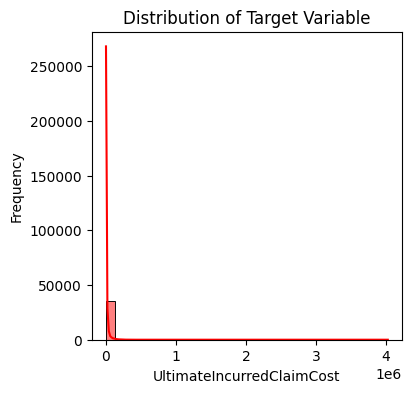

In [30]:
#Checking the skewness of the target variable 
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='UltimateIncurredClaimCost', kde=True, bins=30,color='red')
plt.title('Distribution of Target Variable')
plt.xlabel('UltimateIncurredClaimCost')
plt.ylabel('Frequency')
plt.show()

- The data for UltimateIncurredClaimCost is right skewed.

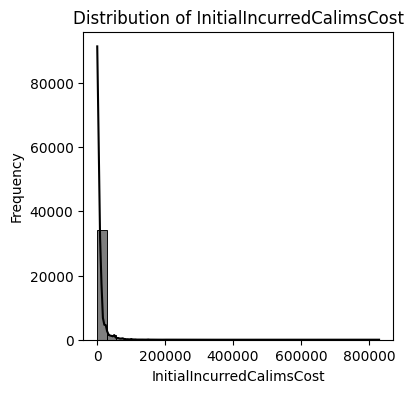

In [31]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='InitialIncurredCalimsCost', kde=True, bins=30,color ='black')
plt.title('Distribution of InitialIncurredCalimsCost')
plt.xlabel('InitialIncurredCalimsCost')
plt.ylabel('Frequency')
plt.show()

- The data for InitialIncurredClaimCost is right skewed.

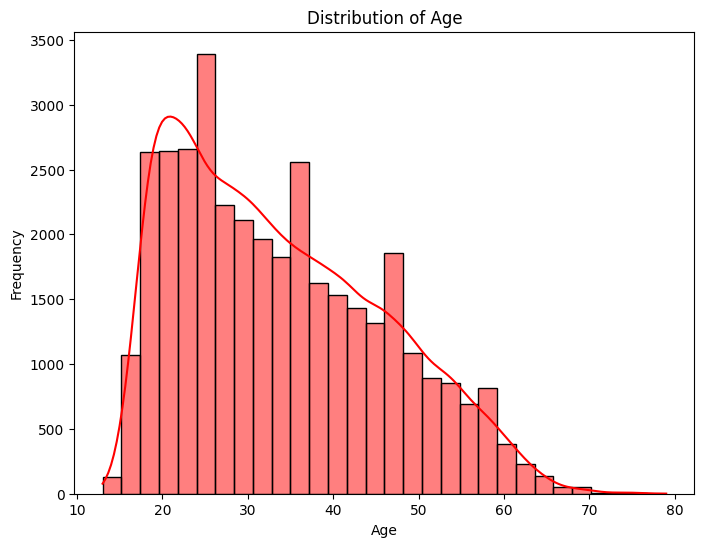

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, bins=30,color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

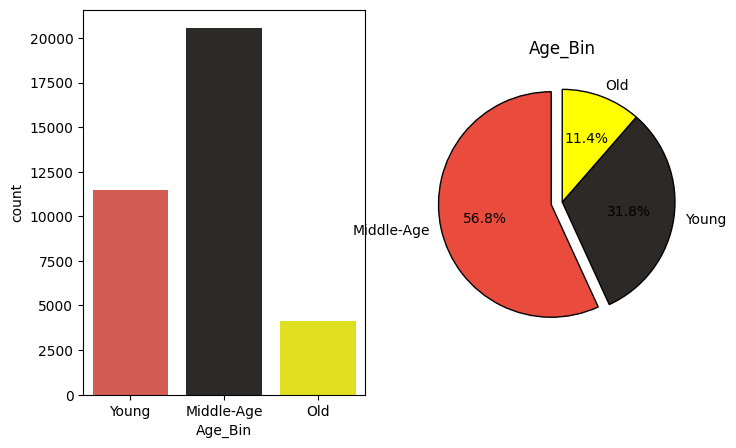

In [33]:
Age_Bin= df['Age_Bin'].value_counts(normalize=True)*100
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Age_Bin', data = df,palette=colors)

plt.subplot(1,2,2)
plt.pie(Age_Bin,labels = ['Middle-Age','Young','Old'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Age_Bin');

- From both the plots we can see that the claims are higher from the middle age group (25-40) which is roughly 57%.

Text(0.5, 1.0, 'DependentChildren')

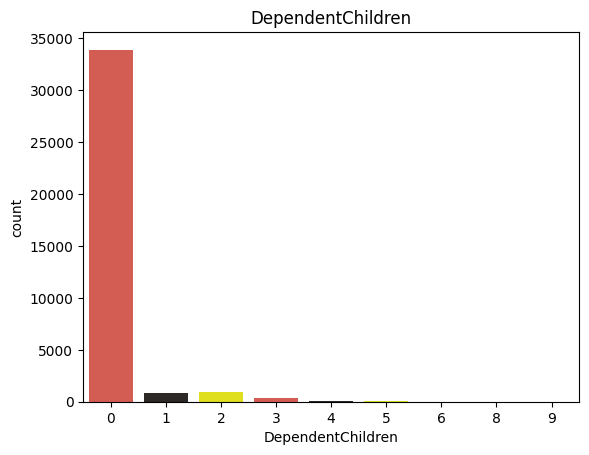

In [34]:
sns.countplot(x = 'DependentChildren', data = df,palette=colors)
plt.title('DependentChildren')

In [35]:
df['DependentChildren'].value_counts(normalize=True)*100

DependentChildren
0    93.703008
2     2.554180
1     2.371738
3     0.975785
4     0.284719
5     0.093985
6     0.011057
9     0.002764
8     0.002764
Name: proportion, dtype: float64

- The claims made from people with no children as dependents is high(Almost 94%).

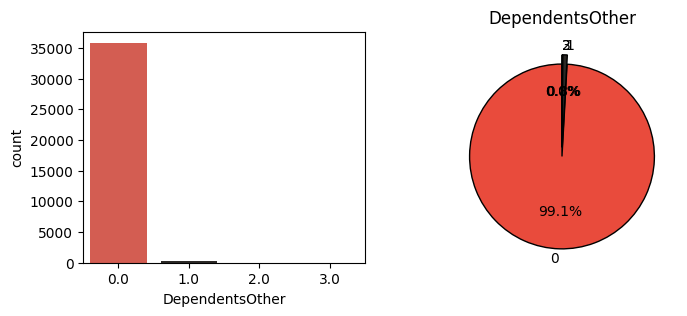

In [36]:
DependentsOther= df['DependentsOther'].value_counts(normalize=True)*100

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (8,3))

plt.subplot(1,2,1)
sns.countplot(x = 'DependentsOther', data = df,palette=colors)


plt.subplot(1,2,2)
plt.pie(DependentsOther,labels = ['0','1','2','3'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DependentsOther');

- The claims made from people with no dependents is high (Almost 99%).

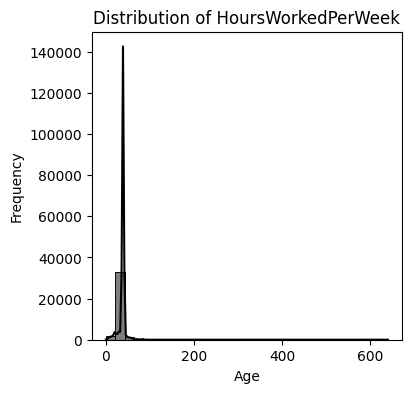

In [37]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='HoursWorkedPerWeek', kde=True, bins=30,color='black')
plt.title('Distribution of HoursWorkedPerWeek')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The data for HoursWorkedPerWeek is positively skewed.

Text(0.5, 1.0, 'DaysWorkedPerWeek')

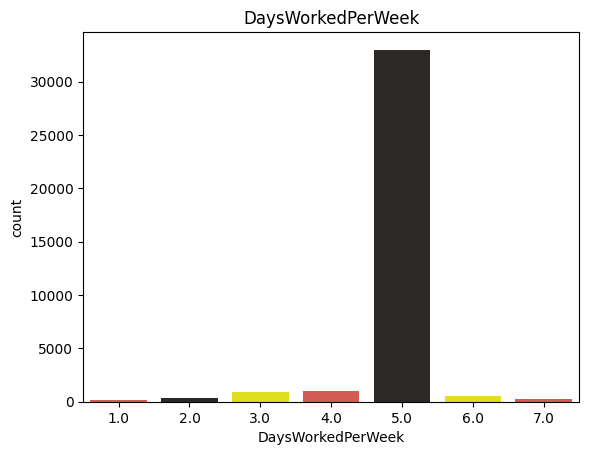

In [38]:
sns.countplot(x = 'DaysWorkedPerWeek', data = df , palette=colors)
plt.title('DaysWorkedPerWeek')

- From the above plot we can see that the people who have claimed for insurance work for 5 days a week.

Text(0.5, 1.0, 'WeeklyWages_Bin')

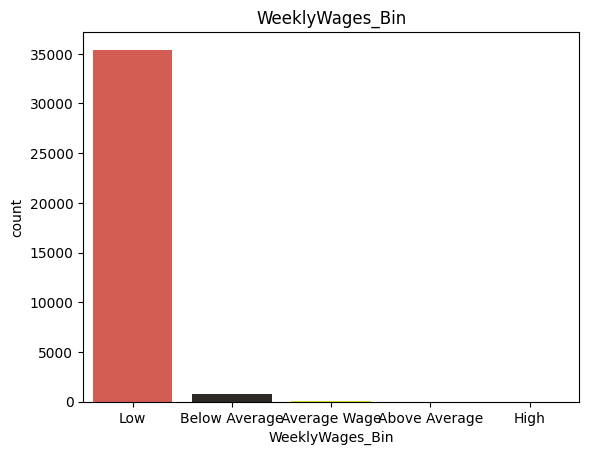

In [39]:
sns.countplot(x = 'WeeklyWages_Bin', data = df , palette=colors)
plt.title('WeeklyWages_Bin')


In [40]:
df['WeeklyWages_Bin'].value_counts(normalize=True)*100

WeeklyWages_Bin
Low              97.910217
Below Average     1.973684
Average Wage      0.105042
Above Average     0.008293
High              0.002764
Name: proportion, dtype: float64

- From the above plot we can see that most of the people who claimed for insurance have low wages

## Bivariate analysis

Text(0.5, 1.0, 'Count Of Age and Target Variable')

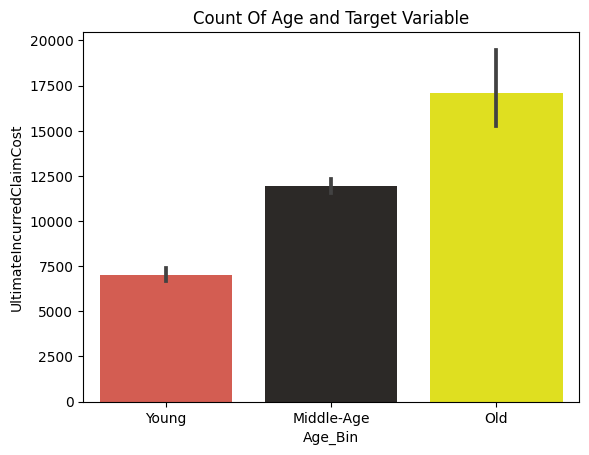

In [41]:
sns.barplot(x='Age_Bin',y='UltimateIncurredClaimCost',data=df , palette=colors)
plt.title('Count Of Age and Target Variable')

- People who are in the old age group (50-80) got more total claims payments by the insurance company.

Text(0.5, 1.0, 'DependentChildren vs UltimateIncurredClaimCost')

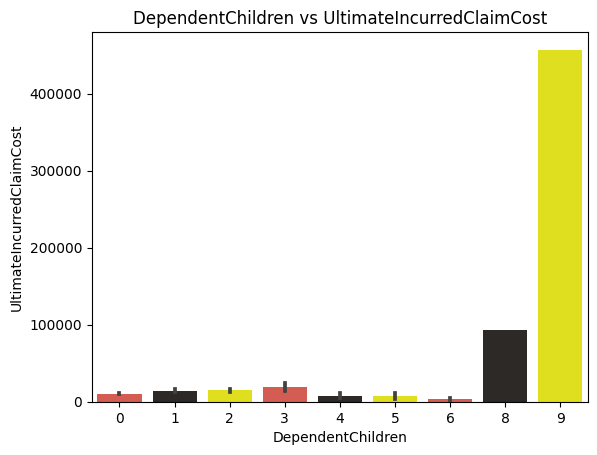

In [42]:
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=df ,palette=colors)
plt.title('DependentChildren vs UltimateIncurredClaimCost')

- People who have more children as dependents got more insurance payments from the insurance company.

Text(0.5, 1.0, 'DependentsOther vs UltimateIncurredClaimCost')

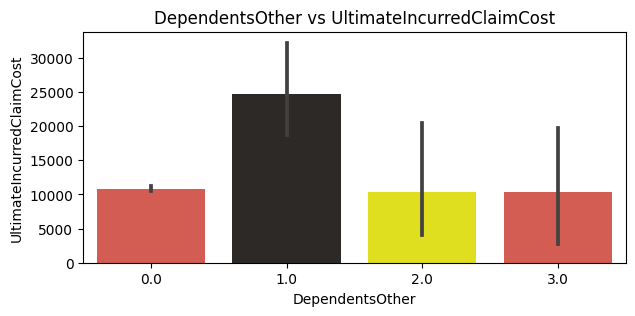

In [43]:
plt.figure(figsize=(7,3))
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=df, palette=colors)
plt.title('DependentsOther vs UltimateIncurredClaimCost')

- People having 1 dependent person other than children has highest ultimate claimed cost.

Text(0.5, 1.0, 'WeeklyWages_Bin vs InitialIncurredCalimsCost')

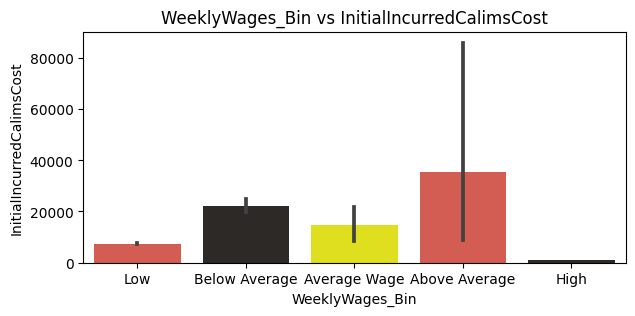

In [44]:
plt.figure(figsize=(7,3))
sns.barplot(x='WeeklyWages_Bin',y='InitialIncurredCalimsCost',data=df,palette=colors)
plt.title('WeeklyWages_Bin vs InitialIncurredCalimsCost')

- People whose wages are above average claimed for more claim cost.

Text(0.5, 1.0, 'WeeklyWages_Bin vs UltimateIncurredClaimCost')

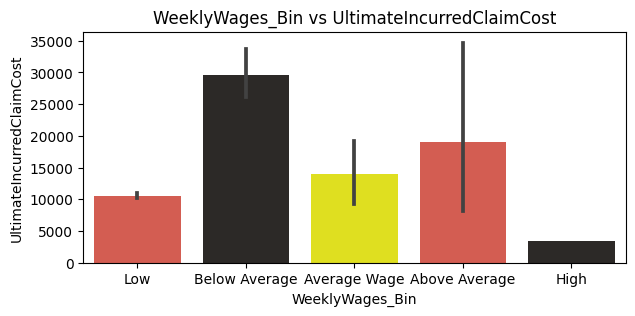

In [45]:
plt.figure(figsize=(7,3))
sns.barplot(x='WeeklyWages_Bin',y='UltimateIncurredClaimCost',data=df,palette=colors)
plt.title('WeeklyWages_Bin vs UltimateIncurredClaimCost')

- People whose wages are below average and above average got more total claims payments by the insurance company.

Text(0.5, 1.0, 'DaysWorkedPerWeek vs UltimateIncurredClaimCost')

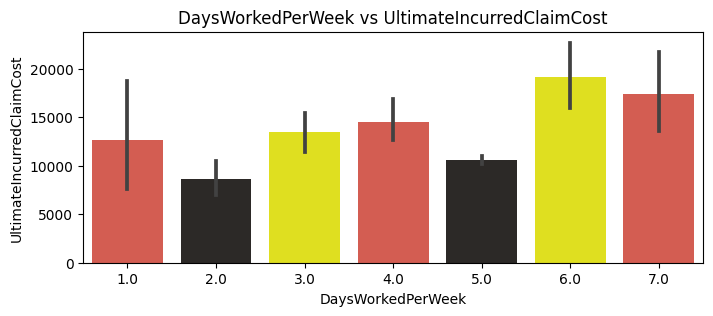

In [46]:
plt.figure(figsize=(8,3))
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df,palette=colors)
plt.title('DaysWorkedPerWeek vs UltimateIncurredClaimCost')

- People who worked 6-7 days per week got more total claims payments by the insurance company.

# Feature Engineering 

In [47]:
df['YearOfAccident']  = pd.DatetimeIndex(df['DateTimeOfAccident']).year
df['MonthOfAccident']  = pd.DatetimeIndex(df['DateTimeOfAccident']).month
df['DayOfAccident']  = pd.DatetimeIndex(df['DateTimeOfAccident']).day
df['HourOfAccident']  = pd.DatetimeIndex(df['DateTimeOfAccident']).hour
df['YearReported']  = pd.DatetimeIndex(df['DateReported']).year


df['ReportDelayInDays'] = pd.DatetimeIndex(df['DateReported']).date - pd.DatetimeIndex(df['DateTimeOfAccident']).date
df['ReportDelayInDays'] = (df['ReportDelayInDays']  / np.timedelta64(1, 'D')).astype(int)
df['ReportDelayInWeeks'] = np.floor(df['ReportDelayInDays'] / 7.).astype(int)
df['ReportDelayInWeeks'] = np.clip(df['ReportDelayInWeeks'], a_max=55, a_min=None)

In [48]:
df.reset_index(drop=True)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,UltimateIncurredClaimCost,Age_Bin,WeeklyWages_Bin,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,ReportDelayInDays,ReportDelayInWeeks
0,WC8205482,2002-04-09 07:00:00+00:00,2002-07-05 00:00:00+00:00,48,M,M,0,0.0,500.00,F,...,4748.203388,Middle-Age,Low,2002,4,9,7,2002,87,12
1,WC6922469,1999-01-07 11:00:00+00:00,1999-01-20 00:00:00+00:00,43,F,M,0,0.0,509.34,F,...,6326.285819,Middle-Age,Low,1999,1,7,11,1999,13,1
2,WC5442654,1996-03-25 00:00:00+00:00,1996-04-14 00:00:00+00:00,30,M,U,0,0.0,709.10,F,...,2293.949087,Middle-Age,Low,1996,3,25,0,1996,20,2
3,WC9796897,2005-06-22 13:00:00+00:00,2005-07-22 00:00:00+00:00,41,M,S,0,0.0,555.46,F,...,17786.487170,Middle-Age,Low,2005,6,22,13,2005,30,4
4,WC2603726,1990-08-29 08:00:00+00:00,1990-09-27 00:00:00+00:00,36,M,M,0,0.0,377.10,F,...,4014.002925,Middle-Age,Low,1990,8,29,8,1990,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29 09:00:00+00:00,1996-06-27 00:00:00+00:00,20,F,S,0,0.0,344.16,F,...,1343.054886,Young,Low,1996,5,29,9,1996,29,4
36172,WC8516685,2002-10-08 08:00:00+00:00,2003-02-07 00:00:00+00:00,35,M,M,0,0.0,1668.83,F,...,172876.632600,Middle-Age,Below Average,2002,10,8,8,2003,122,17
36173,WC6891668,1999-09-22 09:00:00+00:00,1999-11-11 00:00:00+00:00,52,F,M,0,0.0,204.87,P,...,632.281472,Old,Low,1999,9,22,9,1999,50,7
36174,WC4287842,1993-02-05 06:00:00+00:00,1993-03-19 00:00:00+00:00,28,M,M,0,0.0,730.87,F,...,6714.495760,Middle-Age,Low,1993,2,5,6,1993,42,6


In [49]:
numerical_features = [c for c in df.columns if df[c].dtype in ['float64', 'int64','int32'] if c not in ['Acc_Day', 'Acc_Month', 'Acc_Year']]
categorical_features = [c for c in df.columns if c not in numerical_features]

In [50]:
numerical_features

['Age',
 'DependentChildren',
 'DependentsOther',
 'WeeklyWages',
 'HoursWorkedPerWeek',
 'DaysWorkedPerWeek',
 'InitialIncurredCalimsCost',
 'UltimateIncurredClaimCost',
 'YearOfAccident',
 'MonthOfAccident',
 'DayOfAccident',
 'HourOfAccident',
 'YearReported',
 'ReportDelayInDays',
 'ReportDelayInWeeks']

In [51]:
categorical_features

['ClaimNumber',
 'DateTimeOfAccident',
 'DateReported',
 'Gender',
 'MaritalStatus',
 'PartTimeFullTime',
 'ClaimDescription',
 'Age_Bin',
 'WeeklyWages_Bin']

## Correlation

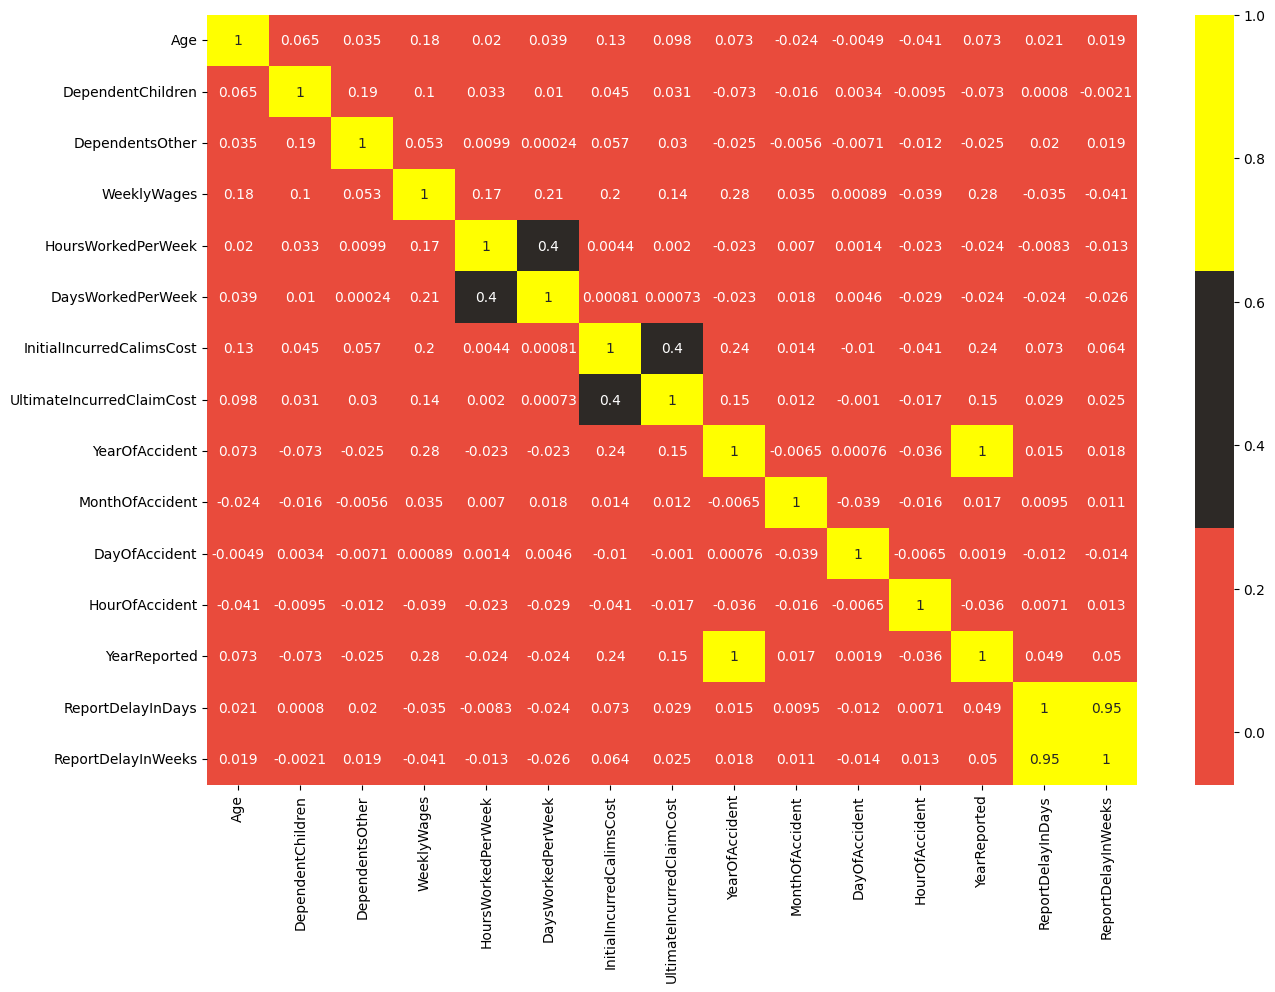

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features].corr(),annot=True , cmap=colors)
plt.show()

- 'DaysWorkedPerWeek' and 'HoursWorkedPerWeek' have a correlation of 0.4, which makes sense as they both refer to the time worked per week in differnt metrics. We will use either one of the 2 in our final model as they both provide the same information.

- 'InitialIncurredCalimsCost' and 'UltimateIncurredClaimCost' have a correlation of 0.4, which is good as we are trying to predict the UltimateIncurredClaimCost and the Ultimate claim cost will be dependent on the Intial claim cost.

- Log transformation is applied on 'InitialIncurredCalimsCost' and 'UltimateIncurredClaimCost' to transform their skewed distributions to approximately normal. This makes the interpretation much easier

<Axes: title={'center': 'Log Scale'}, xlabel='InitialIncurredCalimsCost', ylabel='Density'>

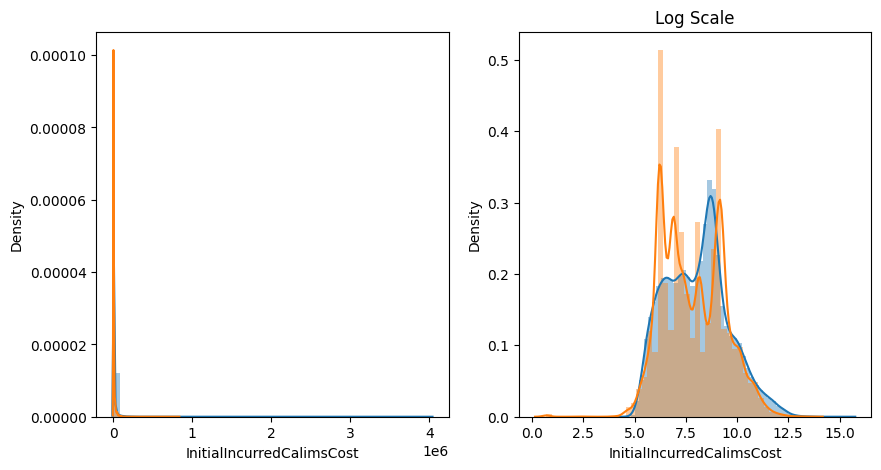

In [53]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.distplot(df["UltimateIncurredClaimCost"])
sns.distplot(df['InitialIncurredCalimsCost'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(df['UltimateIncurredClaimCost']))
sns.distplot(np.log1p(df['InitialIncurredCalimsCost']))

- The above distribution plot after the log transformation can now be easily understood and interpreted. As the Initial estimate by the insurer of the claim cost increases the total claim payments to be made by the insurance company rises

## Outlier Analysis and Treatment


In [54]:
def count_outliers(df):
    # List of numeric columns
    num_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns
    
    # Calculating quartiles and IQR
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    print('Count of all outliers:\n')
    print(((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum())

count_outliers(df)


Count of all outliers:

Age                            15
DependentChildren            2278
DependentsOther               318
WeeklyWages                   987
HoursWorkedPerWeek           4929
DaysWorkedPerWeek            3180
InitialIncurredCalimsCost    2889
UltimateIncurredClaimCost    4525
YearOfAccident                  0
MonthOfAccident                 0
DayOfAccident                   0
HourOfAccident                916
YearReported                    0
ReportDelayInDays            3336
ReportDelayInWeeks           4273
dtype: int64


Insight:

- 'Age' : has low number of outliers can be ignored

- 'DependentChildren' and 'DependentsOther': the numbers or outliers are more but removing records on the basis of these columns may result in deletion of valuable records.

- 'WeeklyWages' : outlier treatment to be performed.

- 'DaysWorkedPerWeek' and 'HoursWorkedPerWeek': removing records from one of them should handle the other column as well because they are related.

- 'InitialIncurredCalimsCost' : outlier treatment to be performed.

- 'UltimateIncurredClaimCost' : outlier treatment to be performed.

In [55]:
# Function to calculate upper and lower bounds for outliers
def outliers_limits(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Function to remove outliers based on the calculated limits
def removal(df, feature, upper, lower):
    new_df = df[(df[feature] > lower) & (df[feature] < upper)]
    return new_df

# Example usage:
feature = ['WeeklyWages','InitialIncurredCalimsCost','UltimateIncurredClaimCost','HourOfAccident','ReportDelayInWeeks','ReportDelayInDays']  
upper_limit, lower_limit = outliers_limits(df, feature)  
cleaned_df = removal(df, feature, upper_limit, lower_limit)  

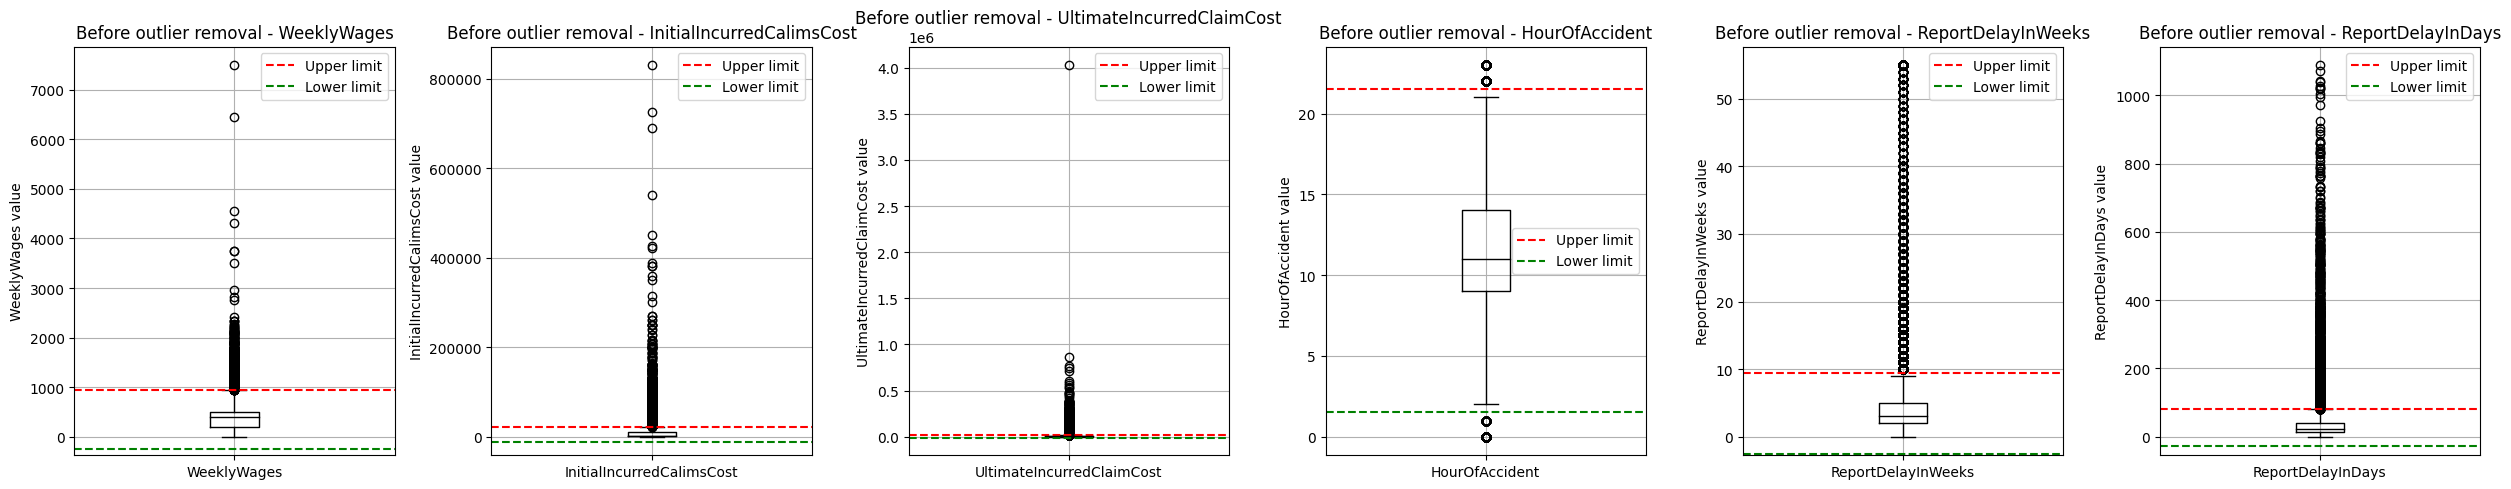

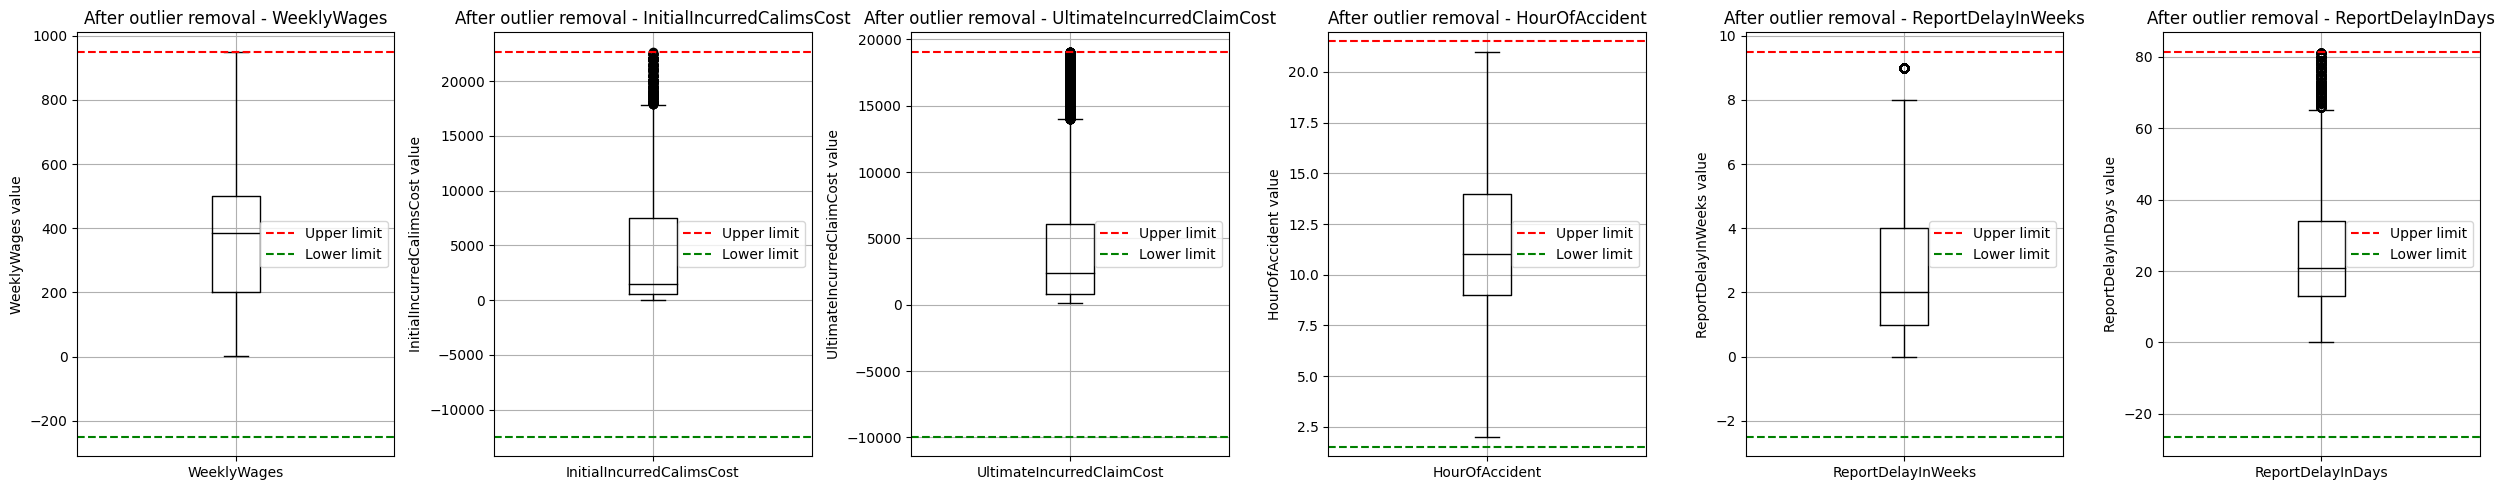

In [56]:
def plot_outliers(df, feature, cleaned_df, upper, lower):
    fig, axes = plt.subplots(nrows=1, ncols=len(feature), figsize=(25, 5))
    
    for i, feat in enumerate(feature):
        # Before removal
        df.boxplot(column=feat, ax=axes[i],color='black')
        axes[i].set_title(f'Before outlier removal - {feat}')
        axes[i].set_ylabel(f'{feat} value')
        axes[i].axhline(y=upper[feat], color='r', linestyle='--', label='Upper limit')
        axes[i].axhline(y=lower[feat], color='g', linestyle='--', label='Lower limit')
        axes[i].legend()
    
    fig.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=len(feature), figsize=(25, 5))
    
    for i, feat in enumerate(feature):
        # After removal
        cleaned_df.boxplot(column=feat, ax=axes[i],color='black')
        axes[i].set_title(f'After outlier removal - {feat}')
        axes[i].set_ylabel(f'{feat} value')
        axes[i].axhline(y=upper[feat], color='r', linestyle='--', label='Upper limit')
        axes[i].axhline(y=lower[feat], color='g', linestyle='--', label='Lower limit')
        axes[i].legend()
    
    fig.tight_layout()
    plt.show()


    
plot_outliers(df, feature, cleaned_df, upper_limit, lower_limit)



In [57]:
#dropping unnecessary columns
df=df.drop(columns=['WeeklyWages_Bin','Age_Bin','ClaimNumber','DateTimeOfAccident','DateReported','ClaimDescription'])
df.head()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,ReportDelayInDays,ReportDelayInWeeks
1,48,M,M,0,0.0,500.00,F,38.0,5.0,1500,4748.203388,2002,4,9,7,2002,87,12
2,43,F,M,0,0.0,509.34,F,37.5,5.0,5500,6326.285819,1999,1,7,11,1999,13,1
3,30,M,U,0,0.0,709.10,F,38.0,5.0,1700,2293.949087,1996,3,25,0,1996,20,2
4,41,M,S,0,0.0,555.46,F,38.0,5.0,15000,17786.487170,2005,6,22,13,2005,30,4
5,36,M,M,0,0.0,377.10,F,38.0,5.0,2800,4014.002925,1990,8,29,8,1990,29,4


# Data Loading for Test Data

In [58]:
df_test = pd.read_csv('Test_SJC.csv')
df_test.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-04-19T16:00:00Z,2002-05-13T00:00:00Z,38,M,M,0,0,500.00,F,40.00,5,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEF...,1000
1,WC2445024,1989-09-26T08:00:00Z,1989-10-14T00:00:00Z,38,F,M,0,0,350.00,P,29.75,4,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-02T13:00:00Z,1994-05-17T00:00:00Z,24,M,S,0,0,487.50,F,38.00,5,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2005-11-26T06:00:00Z,2006-01-07T00:00:00Z,21,M,S,0,0,431.62,F,40.00,5,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-03-12T13:00:00Z,2003-04-10T00:00:00Z,32,M,M,3,0,480.50,F,38.00,5,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [60]:
df_test.isnull().sum()


ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                7
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [61]:
#handling missing values in test data
df_test['MaritalStatus'] = df_test['MaritalStatus'].fillna('U')

In [62]:
df_test.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64

In [63]:
# Type casting : Converting the dtype of 'DateTimeofAccident' and 'Datereported' from object to datetime64

df_test['DateTimeOfAccident']=pd.to_datetime(df_test['DateTimeOfAccident'])
df_test['DateReported']=pd.to_datetime(df_test['DateReported'])

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                17824 non-null  object             
 1   DateTimeOfAccident         17824 non-null  datetime64[ns, UTC]
 2   DateReported               17824 non-null  datetime64[ns, UTC]
 3   Age                        17824 non-null  int64              
 4   Gender                     17824 non-null  object             
 5   MaritalStatus              17824 non-null  object             
 6   DependentChildren          17824 non-null  int64              
 7   DependentsOther            17824 non-null  int64              
 8   WeeklyWages                17824 non-null  float64            
 9   PartTimeFullTime           17824 non-null  object             
 10  HoursWorkedPerWeek         17824 non-null  float64            
 11  Da

In [65]:
#feature engineering for test data

df_test['YearOfAccident']  = pd.DatetimeIndex(df_test['DateTimeOfAccident']).year
df_test['MonthOfAccident']  = pd.DatetimeIndex(df_test['DateTimeOfAccident']).month
df_test['DayOfAccident']  = pd.DatetimeIndex(df_test['DateTimeOfAccident']).day
df_test['HourOfAccident']  = pd.DatetimeIndex(df_test['DateTimeOfAccident']).hour
df_test['YearReported']  = pd.DatetimeIndex(df_test['DateReported']).year

df_test['ReportDelayInDays'] = pd.DatetimeIndex(df_test['DateReported']).date - pd.DatetimeIndex(df_test['DateTimeOfAccident']).date
df_test['ReportDelayInDays'] = (df_test['ReportDelayInDays']  / np.timedelta64(1, 'D')).astype(int)
df_test['ReportDelayInWeeks'] = np.floor(df_test['ReportDelayInDays'] / 7.).astype(int)
df_test['ReportDelayInWeeks'] = np.clip(df_test['ReportDelayInWeeks'], a_max=55, a_min=None)

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                17824 non-null  object             
 1   DateTimeOfAccident         17824 non-null  datetime64[ns, UTC]
 2   DateReported               17824 non-null  datetime64[ns, UTC]
 3   Age                        17824 non-null  int64              
 4   Gender                     17824 non-null  object             
 5   MaritalStatus              17824 non-null  object             
 6   DependentChildren          17824 non-null  int64              
 7   DependentsOther            17824 non-null  int64              
 8   WeeklyWages                17824 non-null  float64            
 9   PartTimeFullTime           17824 non-null  object             
 10  HoursWorkedPerWeek         17824 non-null  float64            
 11  Da

In [67]:
#dropping unimportant features
df_test = df_test.drop(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'ClaimDescription'], axis=1)

# Label Encoding
- Converting text in to numerical values

In [68]:
gender_label = {'M':1, 'F':2, 'U': 3}
marital_label = {'M':1,'S':2, 'U':3}
partTime_label = {'F':1, 'P':2}

df['Gender'] = df['Gender'].map(gender_label)
df['MaritalStatus']= df['MaritalStatus'].map(marital_label)
df['PartTimeFullTime']= df['PartTimeFullTime'].map(partTime_label)

In [69]:
#for test data

df_test['Gender'] = df_test['Gender'].map(gender_label)
df_test['MaritalStatus']= df_test['MaritalStatus'].map(marital_label)
df_test['PartTimeFullTime']= df_test['PartTimeFullTime'].map(partTime_label)

In [70]:
df.head()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,ReportDelayInDays,ReportDelayInWeeks
1,48,1,1,0,0.0,500.00,1,38.0,5.0,1500,4748.203388,2002,4,9,7,2002,87,12
2,43,2,1,0,0.0,509.34,1,37.5,5.0,5500,6326.285819,1999,1,7,11,1999,13,1
3,30,1,3,0,0.0,709.10,1,38.0,5.0,1700,2293.949087,1996,3,25,0,1996,20,2
4,41,1,2,0,0.0,555.46,1,38.0,5.0,15000,17786.487170,2005,6,22,13,2005,30,4
5,36,1,1,0,0.0,377.10,1,38.0,5.0,2800,4014.002925,1990,8,29,8,1990,29,4


In [71]:
df_test.head()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,ReportDelayInDays,ReportDelayInWeeks
0,38,1,1,0,0,500.00,1,40.00,5,1000,2002,4,19,16,2002,24,3
1,38,2,1,0,0,350.00,2,29.75,4,3500,1989,9,26,8,1989,18,2
2,24,1,2,0,0,487.50,1,38.00,5,7500,1994,5,2,13,1994,15,2
3,21,1,2,0,0,431.62,1,40.00,5,1000,2005,11,26,6,2006,42,6
4,32,1,1,3,0,480.50,1,38.00,5,111077,2003,3,12,13,2003,29,4


# Data Normalization
- Normalizing features ensures that all features have a similar scale
- Before normalization we should do train test split so that we can avoid data leakage issues.
- In order to avoid Data Leakage, it is advised to use train-test-split before any transformations. Execute the transformations according to the training data for the training as well as test data.

In [72]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('UltimateIncurredClaimCost', axis=1)
y_train = train['UltimateIncurredClaimCost']

x_test = test.drop('UltimateIncurredClaimCost', axis = 1)
y_test = test['UltimateIncurredClaimCost']

In [73]:
#for train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [74]:
#for test data

df_test_scaled=scaler.fit_transform(df_test)
(df_test-df_test.min())/(df_test.max()-df_test)
scaler.fit(df_test)
scaler.transform(df_test)

array([[0.36764706, 0.        , 0.        , ..., 0.77777778, 0.02191781,
        0.05454545],
       [0.36764706, 0.5       , 0.        , ..., 0.05555556, 0.01643836,
        0.03636364],
       [0.16176471, 0.        , 0.5       , ..., 0.33333333, 0.01369863,
        0.03636364],
       ...,
       [0.08823529, 0.        , 0.5       , ..., 0.22222222, 0.0173516 ,
        0.03636364],
       [0.16176471, 0.        , 0.5       , ..., 0.38888889, 0.01917808,
        0.05454545],
       [0.13235294, 0.        , 0.5       , ..., 0.11111111, 0.00913242,
        0.01818182]])

# Modeling

## Linear regression

It is a machine learning algorithm based on supervised learning. It performs a regression task. Through linear regression we can find out the linear relationship between the target and the explanatory variables.

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [77]:
# predicting the test set results
y_pred = reg.predict(x_test)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

r2 score : 0.10562321552454579


- Root Mean Squared Error (RMSE) is a metric used to evaluate a Regression Model. It tells us how accurate our predictions are and what is the amount of deviation from the actual values.

In [78]:
print((f"Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}"))

Regression RMSE: 45410.651266437555


In [79]:
reg.score(x_train,y_train)

0.24823914659803303

## Random Forest regression

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees.

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
y_pred1 = rf.predict(x_test)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred1)
print("r2 score :", r2)

r2 score : 0.11344291638567794


In [83]:
print((f"Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}"))

Regression RMSE: 45211.69860023026


In [84]:
rf.score(x_train,y_train)

0.8967421622463381

## LGBM Regressor

LightGBM (Light Gradient Boosting Machine) Regressor is a type of gradient boosting model specifically designed for efficiency, speed, and high performance on large datasets. It is a tree-based ensemble model that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one.



In [85]:
from lightgbm import LGBMRegressor
lgbm =LGBMRegressor()

lgbm_model = lgbm.fit(x_train, y_train)
lg_vpreds = lgbm_model.predict(x_test)

r2 = r2_score(y_test, lg_vpreds)
print("r2 score :", r2)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(y_test, lg_vpreds))}"))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 25323, number of used features: 17
[LightGBM] [Info] Start training from score 10718.897305
r2 score : 0.14521843950216928
LGBM RMSE: 44394.07834376454


## XG Boost Regression

It is highly optimized and provides fast and accurate predictions for regression tasks.
XGBoost uses a more traditional depth-wise tree growth strategy compared to LightGBM's leaf-wise strategy.
It supports parallel and distributed computing, making it scalable to large datasets.
XGBoost is known for its flexibility and robustness, as it provides a wide range of hyperparameters for fine-tuning and regularization.

In [86]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_model = xgb.fit(x_train, y_train)
xg_vpreds = xgb_model.predict(x_test)

r2 = r2_score(y_test, lg_vpreds)
print("r2 score :", r2)
print((f"XGBRegressor RMSE: {np.sqrt(mean_squared_error(y_test, xg_vpreds))}"))

r2 score : 0.14521843950216928
XGBRegressor RMSE: 45382.90029449528



- Lower RMSE values indicate a better fit. The RMSE value for LightGBM Regression model is lower as compared to other Regression models.Hence, we go with LightGBM Regression model to predict our Target Variable and further we will do hyperparamter tuning.

## Hyperparameter Tuning for LightGBM regressor

In [87]:
from lightgbm import LGBMRegressor
lgbm =LGBMRegressor(objective = 'regression', 
               num_leaves = 4,
               learning_rate = 0.01, 
               n_estimators = 10000,
               max_bin = 200, 
               bagging_fraction = 0.75,
               bagging_freq = 5, 
               bagging_seed = 7,
               feature_fraction = 0.2,
               feature_fraction_seed = 7,
               verbose = 1,)
                      

lgbm_model = lgbm.fit(x_train, y_train)
lg_vpreds = lgbm_model.predict(x_test)

r2 = r2_score(y_test, lg_vpreds)


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points

In [88]:
print("r2 score :", r2)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(y_test, lg_vpreds))}"))

r2 score : 0.13021427499593796
LGBM RMSE: 44782.01277618353


- Before hyperparameter -> 44394.07834376454
- After  hyperparameter -> 44782.01277618353


# Result
- Let's predict the target variable

In [89]:
lg_vpreds =lgbm_model.predict(df_test_scaled)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [90]:
df_test = df_test
df_test['UltimateIncurredClaimCost'] = lg_vpreds

In [91]:
df_test.head()

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,ReportDelayInDays,ReportDelayInWeeks,UltimateIncurredClaimCost
0,38,1,1,0,0,500.00,1,40.00,5,1000,2002,4,19,16,2002,24,3,5240.234310
1,38,2,1,0,0,350.00,2,29.75,4,3500,1989,9,26,8,1989,18,2,8385.208148
2,24,1,2,0,0,487.50,1,38.00,5,7500,1994,5,2,13,1994,15,2,20491.982849
3,21,1,2,0,0,431.62,1,40.00,5,1000,2005,11,26,6,2006,42,6,-2365.767570
4,32,1,1,3,0,480.50,1,38.00,5,111077,2003,3,12,13,2003,29,4,84406.131682
